# HMS Capstone - Machine Learning - Linear Regression
## By: AJ Goldstein (https://github.com/ajva1996)

### <span style="color:red">Modeling Task: </span>
### Understand the relationship between psychological inflexibility (i.e. AAQ) and mental health outcomes (i.e. depression, anxiety, well-being) while controlling for key demographic info (i.e. race, gender, field of study)

### Why Linear Regression?</span>
- WHY 1: they have very <b><span style="color:red">high interpretability</span></b> (i.e. feature importance)
- WHY 2: they measure the effects of a continous, <b><span style="color:red">linear relationship</span></b> (observed in the EDA phase)
- WHY 3: they <b><span style="color:red">enable interaction terms</span></b> to be incorporated

### <span style="color:red">Analysis Steps:</span>
#### 1) preliminary regression fits
    - AAQ, depression, anxiety, wellbeing
#### 2) simple OLS regression
    - X vs. Y for all 3 combinations
#### 3) OLS regression with interaction terms
    - controlling for categorical demographics

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("talk")

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP #0: Carry forward data from previous notebook

In [72]:
# cleaned dataset
%store -r HMS

# separated modules
%store -r HMS_ids
%store -r HMS_demo
%store -r HMS_mhstatus
%store -r HMS_mhhelp
%store -r HMS_aaq

# tidy variable groups
%store -r tidy_race
%store -r tidy_religion
%store -r tidy_degreeType
%store -r tidy_fieldOfStudy
%store -r tidy_activity
%store -r tidy_age
%store -r tidy_gender
%store -r tidy_relig

## STEP #1: Preliminary Regression Fits

### 1) psychological inflexibility vs. depression

In [73]:
# create new dataframe with only independent & dependent variables
HMS_vars = pd.concat([HMS_aaq.AAQ_total, HMS.deprawsc, HMS.anx_score, HMS.flourish], axis=1)

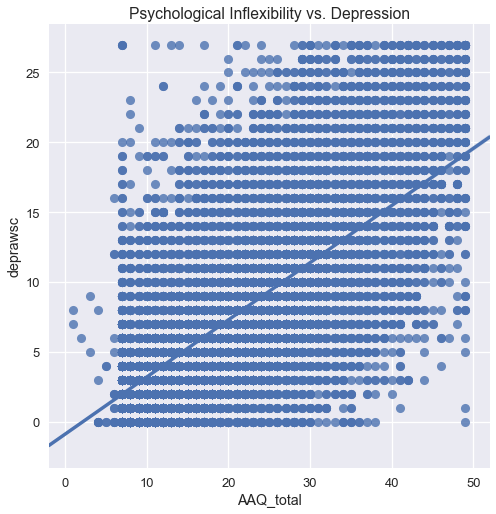

In [74]:
sns.lmplot(x='AAQ_total', y='deprawsc', data=HMS_vars, size=7);
plt.title('Psychological Inflexibility vs. Depression');

### <span style="color:red"> There appears to be a strong, positive linear relationship.</span>
- There are quite a few outliers here, but as a whole, the trend is very strong, which is not surprising
- Intuitively, this could be interpreted as: <span style="color:red">"the more psychologically inflexible a college student is, the worse they will (on average) suffer from depression."</span>

### 2 psychological inflexibility vs. anxiety

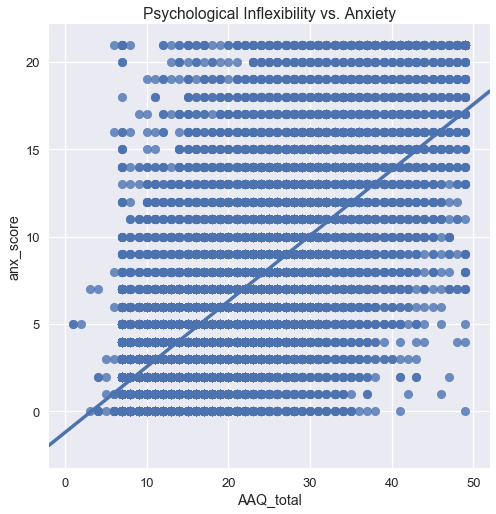

In [75]:
sns.lmplot(x='AAQ_total', y='anx_score', data=HMS_vars, size=7);
plt.title('Psychological Inflexibility vs. Anxiety');

### <span style="color:red"> There appears to be a strong, positive linear relationship.</span>
- There are quite a few outliers here, but as a whole, the trend is very strong, which is not surprising
- Intuitively, this could be interpreted as: <span style="color:red">"the more psychologically inflexible a college student is, the worse they will (on average) suffer from anxiety."</span>

### 3) psychological inflexibility vs. psychological well-being

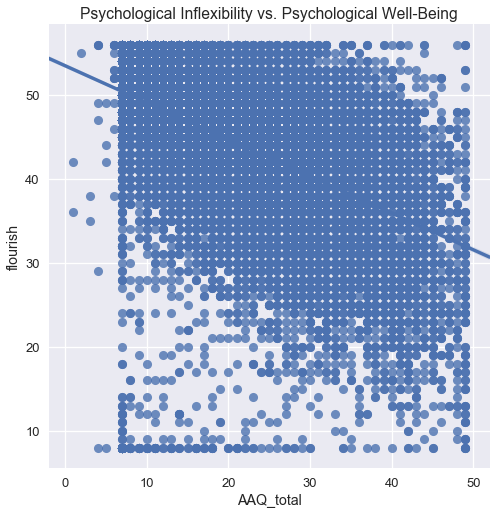

In [76]:
sns.lmplot(x='AAQ_total', y='flourish', data=HMS_vars, size=7);
plt.title('Psychological Inflexibility vs. Psychological Well-Being');

### <span style="color:red"> There appears to be a moderate, negative linear relationship.</span>
- There are many outliers here, but as a whole, the trend is moderate in strength
- Intuitively, this could be interpreted as: <span style="color:red">"the more psychologically inflexible a college student is, the worse their psychological well-being will become."</span>

## STEP #2: Simple OLS Regression

In [145]:
# create RMSE function as absolute measure of fit
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### 1) psychological inflexibility vs. depression

In [155]:
# create training and test set
data = HMS_vars[['deprawsc', 'AAQ_total']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 23325)
('train set:', 15627)
('test:', 7698)


In [147]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                 1.312e+04
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:39:18   Log-Likelihood:                -45326.
No. Observations:               15627   AIC:                         9.066e+04
Df Residuals:                   15625   BIC:                         9.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9663      0.086    -11.265      0.0

In [148]:
# make predictions on test data
predictions = model.predict(testData.AAQ_total)

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.3851618065739144)


### <span style="color:red">Interpretation: </span>

### 2) psychological inflexibility vs. anxiety

In [154]:
# create training and test set
data = HMS_vars[['anx_score', 'AAQ_total']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 23404)
('train set:', 15680)
('test:', 7724)


In [142]:
# perform ordinary least squares (OLS)
model = smf.ols('anx_score~ AAQ_total', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              anx_score   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.224e+04
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:33:15   Log-Likelihood:                -44663.
No. Observations:               15680   AIC:                         8.933e+04
Df Residuals:                   15678   BIC:                         8.935e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1860      0.081    -14.674      0.0

In [144]:
# make predictions on test data
predictions = model.predict(testData.AAQ_total)

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.anx_score))

('model RMSE:', 4.1201440216193808)


### <span style="color:red">Interpretation: </span>

### 3) psychological inflexibility vs. psychological well-being

In [153]:
# create training and test set
data = HMS_vars[['flourish', 'AAQ_total']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 24814)
('train set:', 16625)
('test:', 8189)


In [150]:
# perform ordinary least squares (OLS)
model = smf.ols('flourish ~ AAQ_total', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               flourish   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     5565.
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:39:44   Log-Likelihood:                -57113.
No. Observations:               16625   AIC:                         1.142e+05
Df Residuals:                   16623   BIC:                         1.142e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4880      0.141    378.666      0.0

In [151]:
# make predictions on test data
predictions = model.predict(testData.AAQ_total)

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.flourish))

('model RMSE:', 7.3634953559344574)


### <span style="color:red">Interpretation: </span>

## STEP #3: OLS Regression with Interaction Terms

### 1) RACE as an interaction

In [156]:
tidy_race.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,race
16,R_1gvZNcJatOt9lEi,49.0,NaN,NaN,NaN,BLACK
34,R_1JOq1q31fzyKpXu,45.0,NaN,NaN,NaN,BLACK
40,R_2xwWffFvNbw4BOp,NaN,NaN,NaN,NaN,BLACK
49,R_27kz8oG4lLC41TA,43.0,NaN,NaN,NaN,BLACK
73,R_1NC8EpaqcDX0CLm,52.0,NaN,NaN,NaN,BLACK


In [157]:
# create training and test set
data = tidy_race[['deprawsc', 'AAQ_total', 'race']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 25814)
('train set:', 17295)
('test:', 8519)


In [168]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total + AAQ_total:C(race)', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1818.
Date:                Sun, 03 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:23:38   Log-Likelihood:                -50308.
No. Observations:               17295   AIC:                         1.006e+05
Df Residuals:                   17286   BIC:                         1.007e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [171]:
# make predictions on test data
predictions = model.predict(testData[['AAQ_total','race']])

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.38230032548931)


### 2) RELIGION as an interaction

In [173]:
tidy_religion.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,religion
2,R_1jfUWMzyJCOaAWt,44.0,NaN,NaN,NaN,Agnostic
42,R_12o50OzKzNr9Rx6,47.0,NaN,NaN,NaN,Agnostic
48,R_1HULJL1UZWGW95D,49.0,NaN,NaN,NaN,Agnostic
50,R_3HUfIb47gKNuApE,26.0,NaN,NaN,NaN,Agnostic
63,R_8jfNT8mKLwdwthL,30.0,NaN,NaN,NaN,Agnostic


In [174]:
# create training and test set
data = tidy_religion[['deprawsc', 'AAQ_total', 'religion']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 25516)
('train set:', 17095)
('test:', 8421)


In [176]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total + AAQ_total:C(religion)', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     1430.
Date:                Sun, 03 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:32:40   Log-Likelihood:                -49644.
No. Observations:               17095   AIC:                         9.931e+04
Df Residuals:                   17084   BIC:                         9.939e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [177]:
# make predictions on test data
predictions = model.predict(testData[['AAQ_total','religion']])

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.3390159808662245)


### 3) RELIGIOUSNESS as an interaction

In [178]:
tidy_relig.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,religios
0,R_2BfEp8uMDKl3fvY,32.0,NaN,NaN,NaN,Very Important
1,R_31yEX4Xz6bZzgUr,40.0,NaN,NaN,NaN,Important
3,R_1jfUWMzyJCOaAWt,44.0,NaN,NaN,NaN,Unimportant
4,R_2zVhw9BO1wYB9Jn,NaN,NaN,NaN,NaN,Neutral
5,R_3eaxXkgbEaUkwKR,48.0,NaN,NaN,NaN,Very Important


In [179]:
# create training and test set
data = tidy_relig[['deprawsc', 'AAQ_total', 'religios']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 23308)
('train set:', 15616)
('test:', 7692)


In [182]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total + AAQ_total:C(religios)', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     2546.
Date:                Sun, 03 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:35:58   Log-Likelihood:                -45277.
No. Observations:               15616   AIC:                         9.057e+04
Df Residuals:                   15610   BIC:                         9.061e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [183]:
# make predictions on test data
predictions = model.predict(testData[['AAQ_total','religios']])

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.3785229539477424)


### 4) DEGREE TYPE as an interaction

In [184]:
tidy_degreeType.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,degreeType
19,R_aVPuYwPez3JrQ8V,56.0,NaN,NaN,NaN,Associates
57,R_2BmHNZAppiaL3jT,45.0,NaN,NaN,NaN,Associates
140,R_UJtpoZAzqelP0OZ,48.0,NaN,NaN,NaN,Associates
207,R_ONAVk36REDDBGQF,45.0,NaN,NaN,NaN,Associates
297,R_rfs1FNda8pEKahr,34.0,NaN,NaN,NaN,Associates


In [185]:
# create training and test set
data = tidy_degreeType[['deprawsc', 'AAQ_total', 'degreeType']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 24051)
('train set:', 16114)
('test:', 7937)


In [189]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total + AAQ_total:C(degreeType)', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     1716.
Date:                Sun, 03 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:37:36   Log-Likelihood:                -46740.
No. Observations:               16114   AIC:                         9.350e+04
Df Residuals:                   16105   BIC:                         9.357e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [190]:
# make predictions on test data
predictions = model.predict(testData[['AAQ_total','degreeType']])

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.3564439782622388)


### 5) FIELD OF STUDY as an interaction

In [191]:
tidy_fieldOfStudy.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,fieldOfStudy
20,R_1NkODzy9Xb7AXi5,26.0,NaN,NaN,NaN,HUM
45,R_3p4qQwlalRJswo0,51.0,NaN,NaN,NaN,HUM
47,R_Rav0TBMLW6XuubL,47.0,NaN,NaN,NaN,HUM
48,R_1HULJL1UZWGW95D,49.0,NaN,NaN,NaN,HUM
55,R_DfbDxrwk25fFG4F,53.0,NaN,NaN,NaN,HUM


In [192]:
# create training and test set
data = tidy_fieldOfStudy[['deprawsc', 'AAQ_total', 'fieldOfStudy']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 29197)
('train set:', 19561)
('test:', 9636)


In [194]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total + AAQ_total:C(fieldOfStudy)', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     836.6
Date:                Sun, 03 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:39:06   Log-Likelihood:                -56653.
No. Observations:               19561   AIC:                         1.133e+05
Df Residuals:                   19540   BIC:                         1.135e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [195]:
# make predictions on test data
predictions = model.predict(testData[['AAQ_total','fieldOfStudy']])

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.454990234118652)


### 6) ACTIVITIES as an interaction

In [196]:
tidy_activity.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,activity
1,R_31yEX4Xz6bZzgUr,40.0,NaN,NaN,NaN,ACAD
9,R_2tbCRbV3H8zRoy0,46.0,NaN,NaN,NaN,ACAD
11,R_w7BW2IVlnRHXcI1,53.0,NaN,NaN,NaN,ACAD
14,R_2CIZ2OyHCiIhFUf,48.0,NaN,NaN,NaN,ACAD
19,R_aVPuYwPez3JrQ8V,56.0,NaN,NaN,NaN,ACAD


In [197]:
# create training and test set
data = tidy_activity[['deprawsc', 'AAQ_total', 'activity']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 36216)
('train set:', 24264)
('test:', 11952)


In [198]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total + AAQ_total:C(activity)', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sun, 03 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:40:41   Log-Likelihood:                -69922.
No. Observations:               24264   AIC:                         1.399e+05
Df Residuals:                   24245   BIC:                         1.400e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [200]:
# make predictions on test data
predictions = model.predict(testData[['AAQ_total','activity']])

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.2766109462339692)


### 6) AGE as an interaction

In [201]:
tidy_age.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,age
0,R_2BfEp8uMDKl3fvY,32.0,NaN,NaN,NaN,20
1,R_31yEX4Xz6bZzgUr,40.0,NaN,NaN,NaN,21
3,R_1jfUWMzyJCOaAWt,44.0,NaN,NaN,NaN,22
4,R_2zVhw9BO1wYB9Jn,NaN,NaN,NaN,NaN,19
5,R_3eaxXkgbEaUkwKR,48.0,NaN,NaN,NaN,21


In [203]:
# create training and test set
data = tidy_age[['deprawsc', 'AAQ_total', 'age']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 23325)
('train set:', 15627)
('test:', 7698)


In [207]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total + AAQ_total:C(age)', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     1848.
Date:                Sun, 03 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:43:57   Log-Likelihood:                -45241.
No. Observations:               15627   AIC:                         9.050e+04
Df Residuals:                   15619   BIC:                         9.056e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [205]:
# make predictions on test data
predictions = model.predict(testData[['AAQ_total','age']])

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.4278642225304541)


### 7) GENDER as an interaction

In [208]:
tidy_gender.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,gender
0,R_2BfEp8uMDKl3fvY,32.0,NaN,NaN,NaN,Female
1,R_31yEX4Xz6bZzgUr,40.0,NaN,NaN,NaN,Female
3,R_1jfUWMzyJCOaAWt,44.0,NaN,NaN,NaN,Male
4,R_2zVhw9BO1wYB9Jn,NaN,NaN,NaN,NaN,Male
5,R_3eaxXkgbEaUkwKR,48.0,NaN,NaN,NaN,Male


In [210]:
# create training and test set
data = tidy_gender[['deprawsc', 'AAQ_total', 'gender']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 23301)
('train set:', 15611)
('test:', 7690)


In [218]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total + AAQ_total:C(gender)', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     4444.
Date:                Sun, 03 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:45:32   Log-Likelihood:                -45234.
No. Observations:               15611   AIC:                         9.048e+04
Df Residuals:                   15607   BIC:                         9.051e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [171]:
# make predictions on test data
predictions = model.predict(testData[['AAQ_total','race']])

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.38230032548931)


In [90]:
tidy_degreeType.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,degreeType
19,R_aVPuYwPez3JrQ8V,56.0,NaN,NaN,NaN,Associates
57,R_2BmHNZAppiaL3jT,45.0,NaN,NaN,NaN,Associates
140,R_UJtpoZAzqelP0OZ,48.0,NaN,NaN,NaN,Associates
207,R_ONAVk36REDDBGQF,45.0,NaN,NaN,NaN,Associates
297,R_rfs1FNda8pEKahr,34.0,NaN,NaN,NaN,Associates


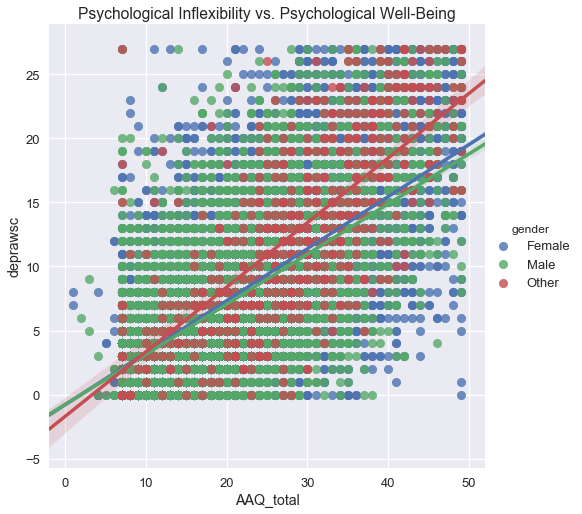

In [94]:
sns.lmplot(x='AAQ_total', y='deprawsc', data=tidy_gender, hue='gender', size=7);
plt.title('Psychological Inflexibility vs. Psychological Well-Being');

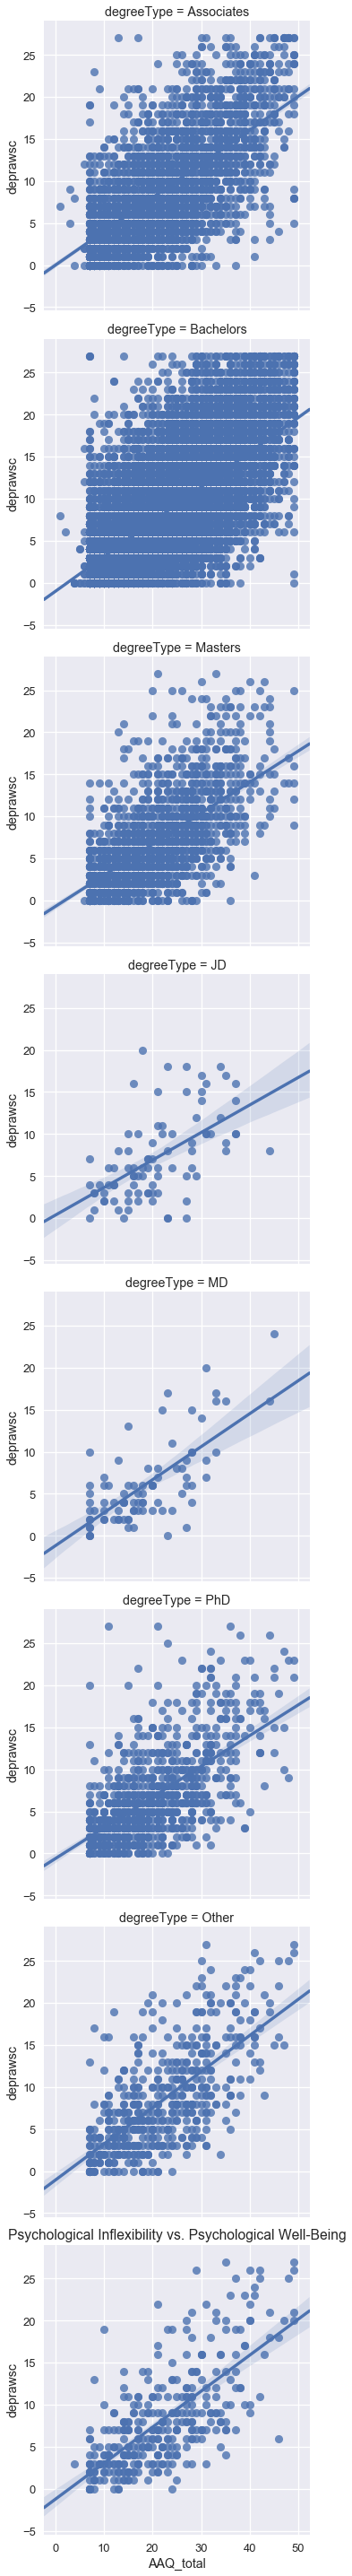

In [89]:
sns.lmplot(x='AAQ_total', y='deprawsc', data=tidy_degreeType, row='degreeType', size=5);
plt.title('Psychological Inflexibility vs. Psychological Well-Being');